In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
df=pd.read_csv(r"C:\Users\RAMESWAR BISOYI\Downloads\processed.csv")

In [7]:
df

,onehotencoder__Item_Type_Baking Goods,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,onehotencoder__Item_Type_Dairy,onehotencoder__Item_Type_Frozen Foods,onehotencoder__Item_Type_Fruits and Vegetables,onehotencoder__Item_Type_Hard Drinks,onehotencoder__Item_Type_Health and Hygiene,onehotencoder__Item_Type_Household,...,Outlet_Age_Category_Old,Outlet_Age_Category_Very Old,Yearly_Sales_Trend,Item_Sales_Rank,scaled_remainder__Item_Weight,scaled_remainder__Item_Visibility,scaled_remainder__Item_MRP,scaled_remainder__Item_Outlet_Sales,scaled_remainder__Outlet_Age,log_transformed_sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2348.354635,1447.5,-0.828359,-1.170199,1.747351,0.971666,-0.139533,0.678879
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1995.498739,7420.5,-1.625269,-1.099096,-1.488936,0.000000,-1.334024,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2348.354635,3674.5,1.104972,-1.154513,0.010040,0.000000,-0.139533,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,339.351662,6655.5,1.505785,-0.067981,0.660011,0.000000,-0.020083,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,2298.995256,6033.0,-0.915595,-0.067981,-1.399138,0.000000,1.293858,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2298.995256,2593.0,-1.402464,-0.273717,1.180714,0.382845,1.293858,0.324143
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2192.384798,7132.0,-1.045270,-0.489408,-0.527270,0.000000,-0.497880,0.000000
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2438.841866,5593.5,-0.521856,-0.749006,-0.897155,0.000000,-0.736779,0.000000
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1995.498739,4150.0,-1.321123,1.672526,-0.607941,0.000000,-1.334024,0.000000


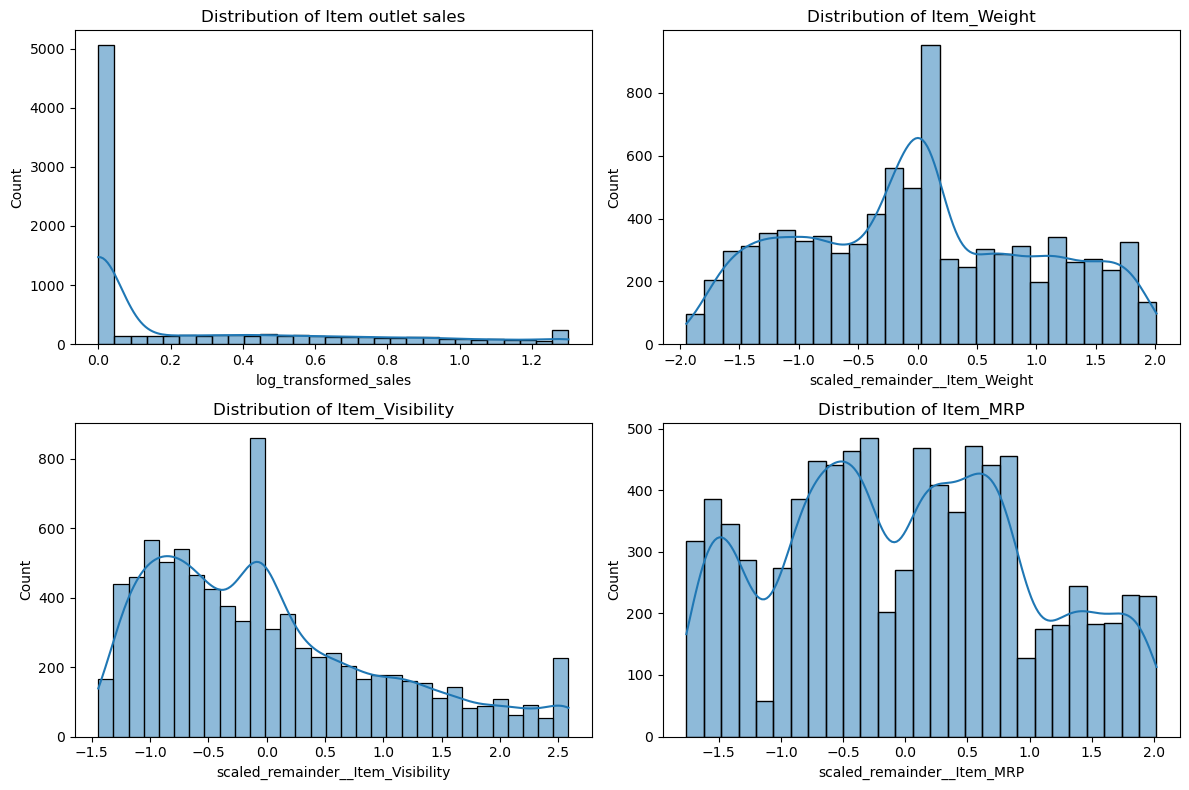

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(df['log_transformed_sales'],kde=True)
plt.title("Distribution of Item outlet sales")

plt.subplot(2, 2, 2)
sns.histplot(df['scaled_remainder__Item_Weight'], kde=True)
plt.title('Distribution of Item_Weight')

plt.subplot(2, 2, 3)
sns.histplot(df['scaled_remainder__Item_Visibility'], kde=True)
plt.title('Distribution of Item_Visibility')

plt.subplot(2, 2, 4)
sns.histplot(df['scaled_remainder__Item_MRP'], kde=True)
plt.title('Distribution of Item_MRP')

plt.tight_layout()
plt.show()

In [12]:
# Assuming 'df' is the DataFrame containing your dataset
X = df.drop(columns=['log_transformed_sales'])
y = df['log_transformed_sales']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [ ]:
# Print model performance
print("\nModel Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [23]:
# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [25]:
# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR()
}

In [27]:
# Dictionary to store performance of each model
model_performance = {}

# Train each model and evaluate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store the performance
    model_performance[model_name] = {
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

In [28]:
# Print each model's performance
for model_name, metrics in model_performance.items():
    print(f"\nPerformance for {model_name}:")
    print(f"R² Score: {metrics['R² Score']:.2f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")


Performance for Linear Regression:
R² Score: 1.00
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.02

Performance for Ridge Regression:
R² Score: 1.00
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.02

Performance for Lasso Regression:
R² Score: 0.95
Mean Absolute Error (MAE): 0.07
Root Mean Squared Error (RMSE): 0.08

Performance for Random Forest:
R² Score: 1.00
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00

Performance for Decision Tree:
R² Score: 1.00
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00

Performance for Support Vector Regressor:
R² Score: 0.98
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.06


In [29]:
# Find the best model based on R² Score
best_model_name = max(model_performance, key=lambda k: model_performance[k]["R² Score"])
best_model = models[best_model_name]
best_metrics = model_performance[best_model_name]


In [30]:
# Print the best model and its performance metrics
print(f"Best Model: {best_model_name}\n")
print("Model Performance:")
print(f"R² Score: {best_metrics['R² Score']:.2f}")
print(f"Mean Absolute Error (MAE): {best_metrics['MAE']:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_metrics['RMSE']:.2f}")

Best Model: Random Forest

Model Performance:
R² Score: 1.00
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
